<a href="https://colab.research.google.com/github/7692TITO/-NYC-Taxi-Trip-Time-Prediction/blob/main/Copy_of_NYC_Taxi_Trip_Time_Prediction_(Loud_n_Cloud)_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

#Intoduction
This is our Regression Capstone Project,hence we will be looking into multiple regression models and try to come up with a best model at the end of this project. We are only focussing on all that algorithm which has been taught to us till now in our class. 
SVM,Time Series, Clustering and many more algos. still yet to be taught to us.


#ML Pipeline to be followed 

1. Basic  Dataset Understanding(Dimensionality,records,Data Types,5-point summary)
2. Data Cleaning
3. Exploratory Data Analysis
4. Feature Engineering
5. Feature Selection
6. Model Buliding
7. Evaluation
8. Hyperparameter tuning/cross Validation



In [125]:
#Importing all the required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import datetime

In [126]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [127]:
#Mounting the Drive inorder to load the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [128]:
#Reading the csv dataset
df=pd.read_csv('/content/drive/MyDrive/NYC Taxi Data.csv')

#1.Basic Dataset Understanding(Dimensionality,records,Data Types,5-point summary)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [130]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [131]:
df.shape

(1458644, 11)

In [132]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [133]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [134]:
#converting the datatype of pickup date time and dropoff date time to datetime datatype
df['pickup_datetime']= pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']= pd.to_datetime(df['dropoff_datetime'])

In [135]:
#Adding some new features into the dataset 
#Extract day and month from pickup and dropoff time


df['pickup_datetime_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_datetime_day']=df['dropoff_datetime'].dt.day_name()

df['pickup_datetime_month']=pd.DatetimeIndex(df['pickup_datetime']).month
df['dropoff_datetime_month']=pd.DatetimeIndex(df['dropoff_datetime']).month



In [136]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_datetime_day,dropoff_datetime_day,pickup_datetime_month,dropoff_datetime_month
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,3,3
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,1,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,4,4
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,3,3


#2.Data Cleaning

In [137]:
#Checking Missing Values
df.isnull().sum()

id                        0
vendor_id                 0
pickup_datetime           0
dropoff_datetime          0
passenger_count           0
pickup_longitude          0
pickup_latitude           0
dropoff_longitude         0
dropoff_latitude          0
store_and_fwd_flag        0
trip_duration             0
pickup_datetime_day       0
dropoff_datetime_day      0
pickup_datetime_month     0
dropoff_datetime_month    0
dtype: int64

In [138]:
#Checking Duplicated Rows
df.duplicated().sum()

0

We have came across a beautiful finding while analyzing our dataset where we can see from below data that there are around 6616 datapoint in which both the pickup and dropoff longitudes are same. 
Practically it means that there won't be any trip duration and it should be zero. hence we decided to drop these data points because its not relavnt to real world scnerio.


In [139]:
df.loc[df['pickup_latitude']==df['dropoff_latitude'] ,['pickup_latitude','dropoff_latitude','trip_duration']]

,pickup_latitude,dropoff_latitude,trip_duration
246,40.768963,40.768963,227
291,40.775661,40.775661,1109
407,40.687336,40.687336,947
702,40.647041,40.647041,580
1620,40.816853,40.816853,27
...,...,...,...
1456399,40.756721,40.756721,1284
1456627,40.768517,40.768517,127
1456989,40.728222,40.728222,566
1457114,40.770988,40.770988,632


#3.Exploratory Data Analysis

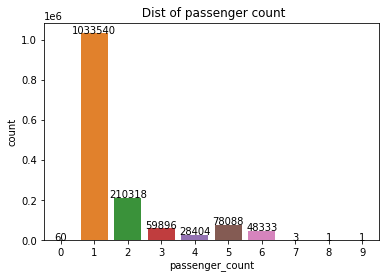

In [140]:
ax = sns.countplot(x = df['passenger_count'])
plt.title(' Dist of passenger count')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + (p.get_width()/2),
    y = height+0.2, ha = 'center', s = '{:.0f}'.format(height))
plt.show()

Text(0.5, 1.0, ' no of dropoffs done on each day of the week')

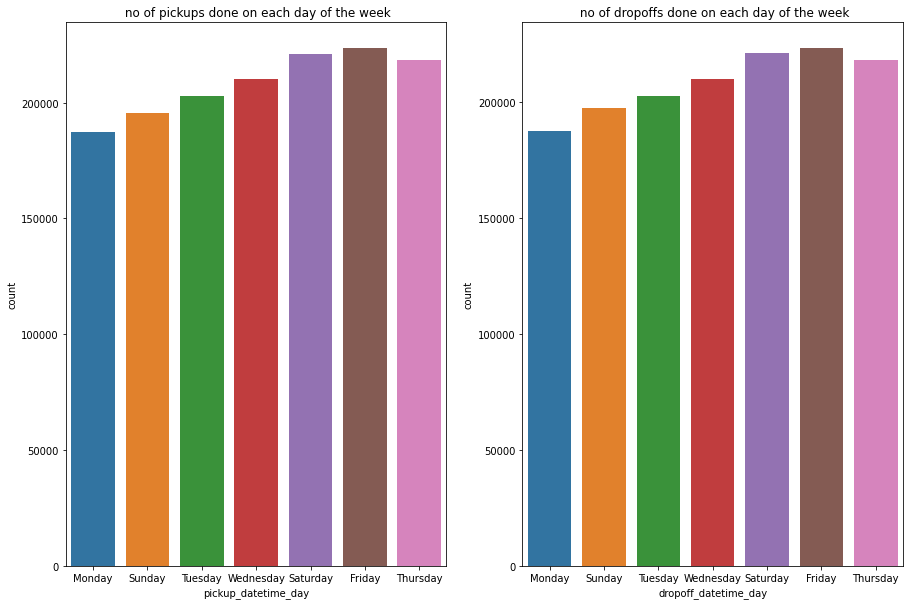

In [141]:
figure, ax = plt.subplots(nrows = 1, ncols=2, figsize = (15,10))
sns.countplot(x = 'pickup_datetime_day', data = df, ax = ax[0])
ax[0].set_title(' no of pickups done on each day of the week')

sns.countplot(x = 'dropoff_datetime_day', data = df, ax = ax[1])
ax[1].set_title(' no of dropoffs done on each day of the week')

#plt.tight_layout()

In [142]:
def timezone(x):
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'morning'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(16, 0, 0):
        return 'midday'
    elif x>=datetime.time(16, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'evening'
    elif x>=datetime.time(22, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'late night'
    
df['pickup_timezone']=df['pickup_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
df['dropoff_timezone']=df['dropoff_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

In [143]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_datetime_day,dropoff_datetime_day,pickup_datetime_month,dropoff_datetime_month,pickup_timezone,dropoff_timezone
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,3,3,evening,evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,6,late night,late night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,1,1,midday,midday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,4,4,evening,evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,3,3,midday,midday


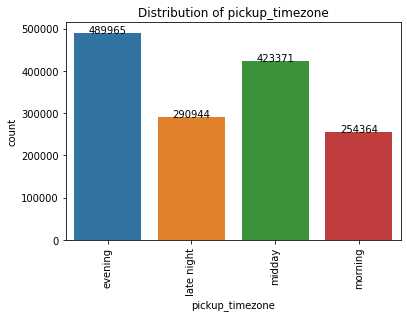

In [144]:
ax = sns.countplot(x=df['pickup_timezone']);
plt.title('Distribution of pickup_timezone')
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height+0.2, ha = 'center',s = '{:.0f}'.format(height)) # data label, formatted to ignore decimals
    #ha = ‘center’) # sets horizontal alignment (ha) to center
plt.xticks(rotation = 'vertical')    
plt.show()

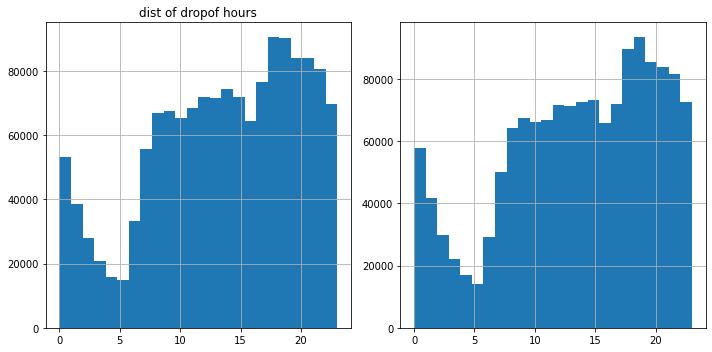

In [145]:
figure, ax = plt.subplots(nrows = 1, ncols=2, figsize = (10,5))

df['pickup_hour'] = df['pickup_datetime'].dt.hour
df.pickup_hour.hist(bins = 24, ax = ax[0])
ax[0].set_title('dist of pickup hrs')

df['dropoff_hour'] = df['dropoff_datetime'].dt.hour
df.dropoff_hour.hist(bins = 24, ax = ax[1])
ax[0].set_title('dist of dropof hours')

plt.tight_layout()

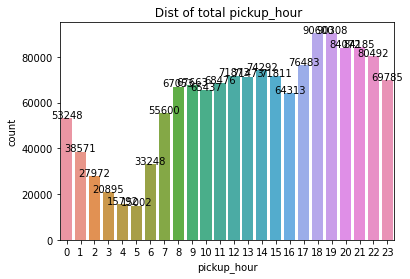

In [146]:
ax = sns.countplot(x = df['pickup_hour'])
plt.title(' Dist of total pickup_hour')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + (p.get_width()/2),
    y = height+0.2, ha = 'center', s = '{:.0f}'.format(height))
plt.show()

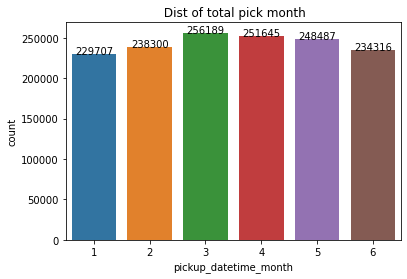

In [147]:
ax = sns.countplot(x = df['pickup_datetime_month'])
plt.title(' Dist of total pick month')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + (p.get_width()/2),
    y = height+0.2, ha = 'center', s = '{:.0f}'.format(height))
plt.show()

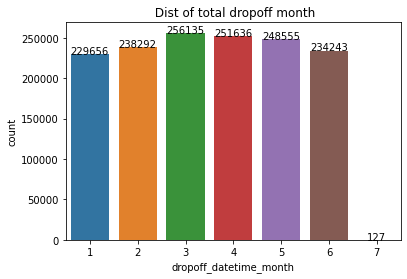

In [148]:
ax = sns.countplot(x = df['dropoff_datetime_month'])
plt.title(' Dist of total dropoff month')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + (p.get_width()/2),
    y = height+0.2, ha = 'center', s = '{:.0f}'.format(height))
plt.show()

#4.Feature Engineering

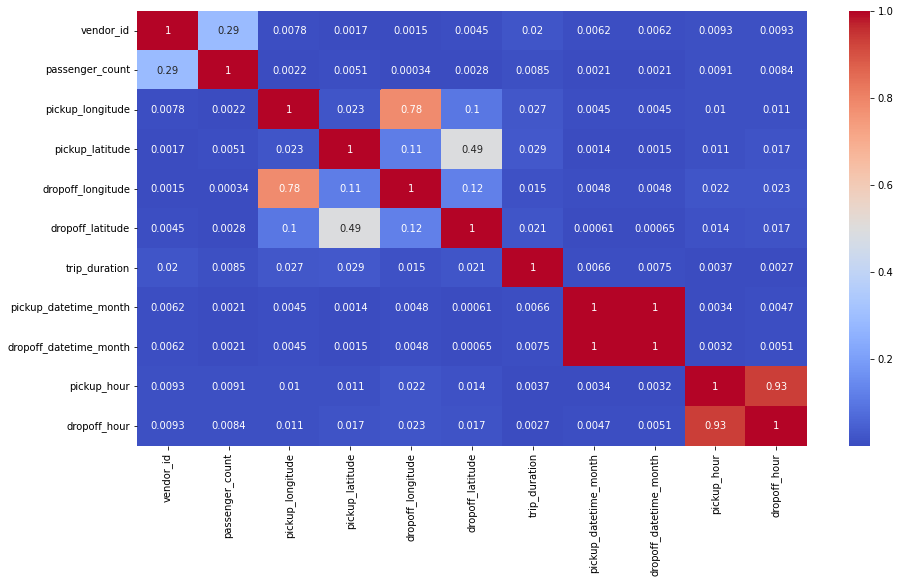

In [149]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation=df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

#Step-1. Try to reduce the Multicollinearity in different features
#A)
Over here we have  derived a new feature (trip_distance) using the available features in our dataset like geographical lattitude and longitude,thereby it will helps us later on to drop these features (lattitude,longitude) from our original dataset inorder to treat multicollinearity present in this features


In [150]:
from math import radians, cos, sin, asin, sqrt
# Implement the formula below
def distance_d(LaA, LaB, LoA, LoB):
  # The function "radians" is found in the math module, It's also used to convert radians to degrees.  
  LoA = radians(LoA)  
  LoB = radians(LoB)  
  LaA= radians(LaA)  
  LaB = radians(LaB) 
  # The "Haversine formula" is used.
  D_Lo = LoB - LoA 
  D_La = LaB - LaA 
  P = sin(D_La / 2)**2 + cos(LaA) * cos(LaB) * sin(D_Lo / 2)**2  

  Q = 2 * asin(sqrt(P))   
  # The earth's radius in kilometers.
  R_km = 6371  
# Then we'll compute the outcome.
  return Q*R_km

In [151]:
df['trip_distance']= df.apply(lambda  x: distance_d(x['pickup_latitude'],x['dropoff_latitude'],x['pickup_longitude'],x['dropoff_longitude']),axis=1)

In [152]:
df = df[df.trip_distance != 0.00]

In [153]:
df.shape

(1452747, 20)

In [154]:
df['pickup_hour'].replace(to_replace=0,value=24,inplace=True) #replacing 0 hr with 24 hr 

In [155]:
df.drop(df[df['passenger_count']==0].index, inplace = True) #Drop all records where passenger count is 0 because a trip cannot be assigned without a passenger

In [156]:
#df.drop(labels=['pickup_latitude','dropoff_latitude','pickup_longitude','dropoff_longitude','id'],axis=1,inplace=True)

#B)
Here we again try to bulid up a new features trip_speed using trip_distance(km) and trip_duration(seconds). We have used 0.621 to convert the trip distance to miles and 0.00278 to convert seconds to hour

In [157]:
def speed(x,y):
  z = (x*0.621)/(y*0.000278)
  return z

In [158]:
df['trip_speed']= df.apply(lambda x: speed(x['trip_distance'],x['trip_duration']),axis=1)

#C)
Over here we have tried to reduce the multicollinearity present in pickup datetime month and dropoff datetime month by clubbing it one feature using a function

In [159]:
def trip_month(x,y):
  if x==y:
    return x
  else:
    return y

In [160]:
df['trip_month']=df.apply(lambda x: trip_month(x['pickup_datetime_month'],x['dropoff_datetime_month']),axis=1)

In [161]:
df.drop(labels=['pickup_datetime_month','dropoff_datetime_month','pickup_datetime','dropoff_datetime','pickup_latitude','dropoff_latitude','pickup_longitude','dropoff_longitude','id'],axis=1,inplace=True)

In [162]:
df.drop(labels=['dropoff_hour'],axis=1,inplace=True)

In [163]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [164]:
calc_vif(df[[i for i in df.describe().columns if i not in ['vendor_id','trip_duration']]])

,variables,VIF
0,passenger_count,2.313616
1,pickup_hour,3.903164
2,trip_distance,2.139014
3,trip_speed,2.413622
4,trip_month,3.648436


In [165]:
numeric_features = ['passenger_count','pickup_hour','trip_distance','trip_speed','trip_month']

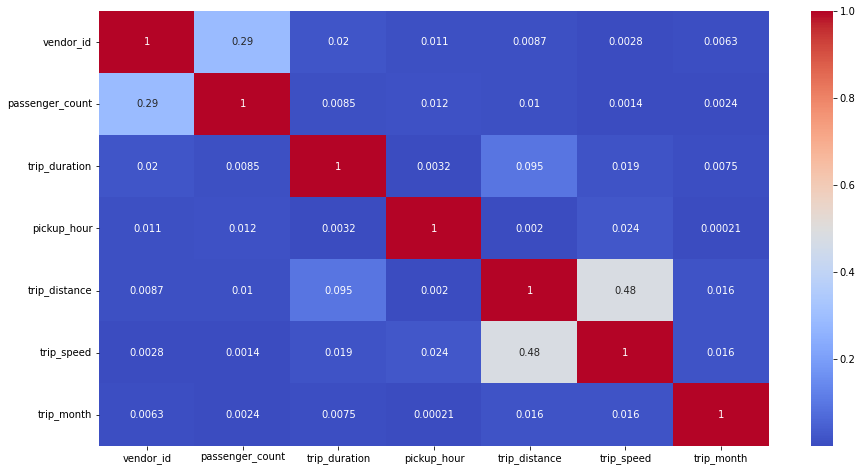

In [166]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation=df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

#Handling Outliers

In [167]:
categorical_features = df.describe(include=['object','category']).columns

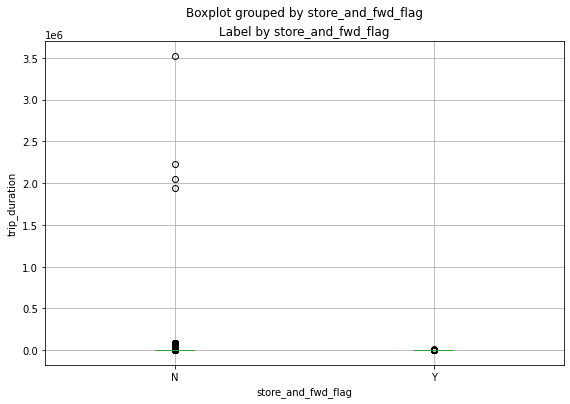

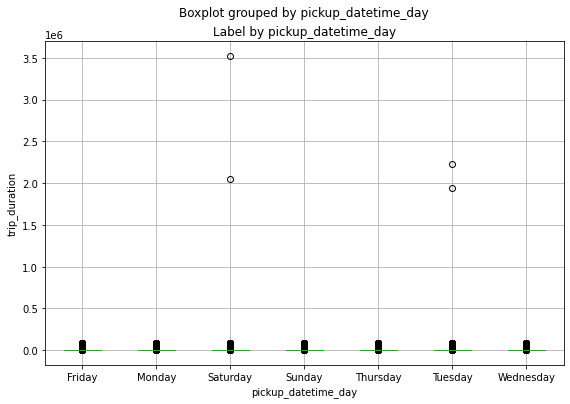

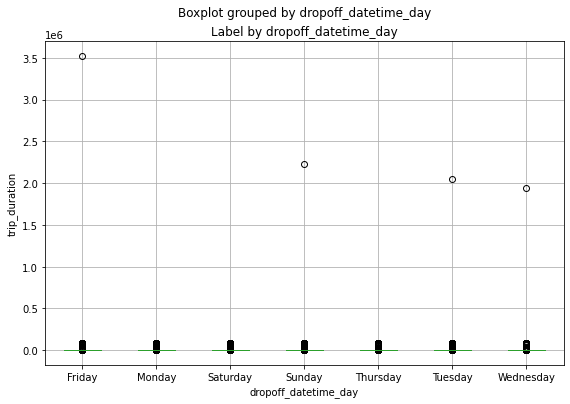

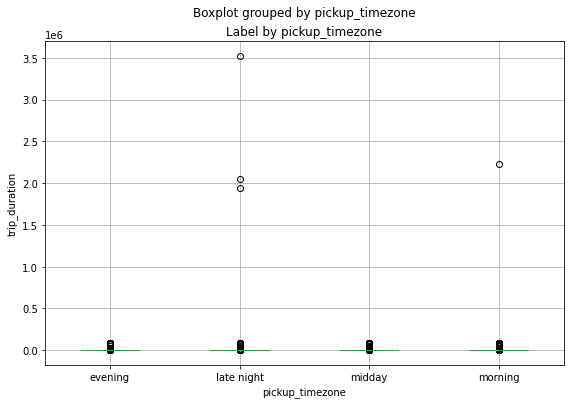

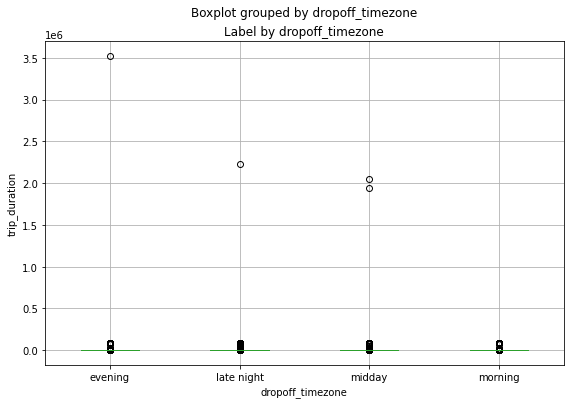

In [168]:
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(column ='trip_duration', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("trip_duration")
plt.show()

In [169]:
df[df['trip_duration']>=1800000]

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,pickup_datetime_day,dropoff_datetime_day,pickup_timezone,dropoff_timezone,pickup_hour,trip_distance,trip_speed,trip_month
355003,1,1,N,1939736,Tuesday,Wednesday,late night,midday,24,20.148664,0.023203,1
680594,1,2,N,2049578,Saturday,Tuesday,late night,midday,22,5.982487,0.006520,3
924150,1,1,N,2227612,Tuesday,Sunday,morning,late night,6,1.635128,0.001640,1
978383,1,1,N,3526282,Saturday,Friday,late night,evening,22,19.900661,0.012607,3


In [170]:
df.drop(df[df['trip_duration'] > 1800000].index, inplace = True)

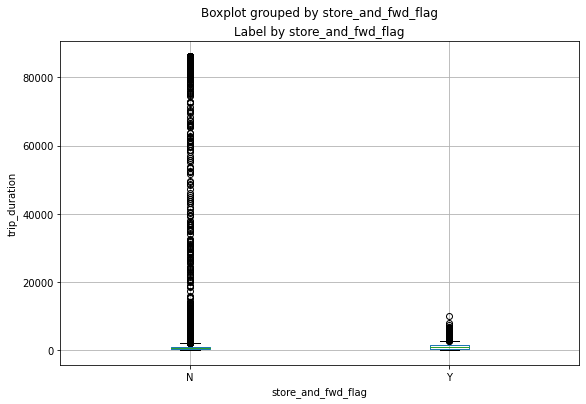

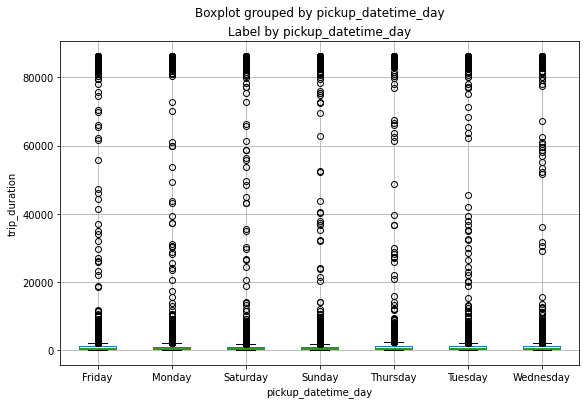

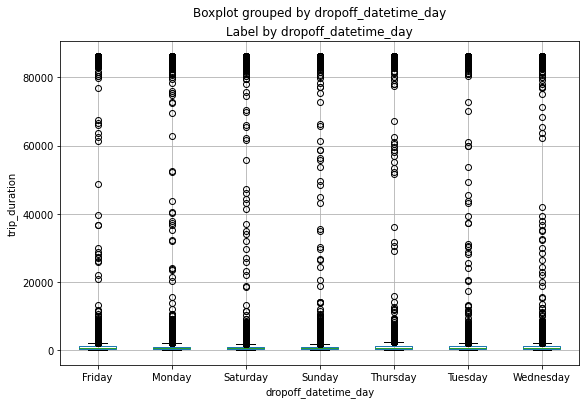

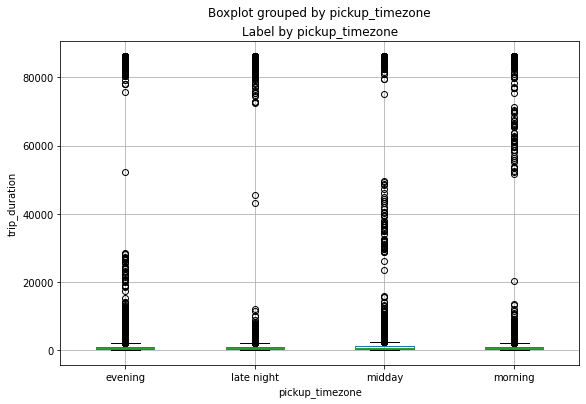

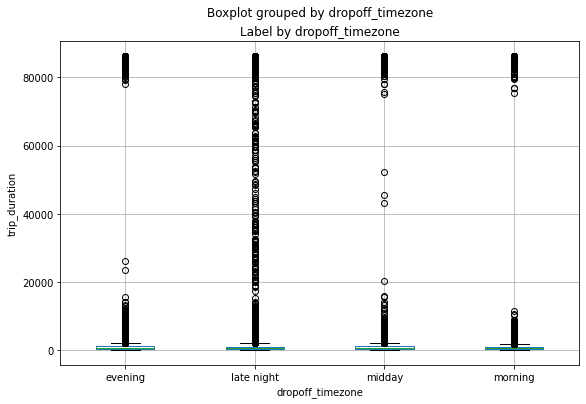

In [171]:
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(column ='trip_duration', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("trip_duration")
plt.show()

#Step-2 Multivariate Normality check and Handling it with log transform


Text(0.5, 0, 'trip_duration')

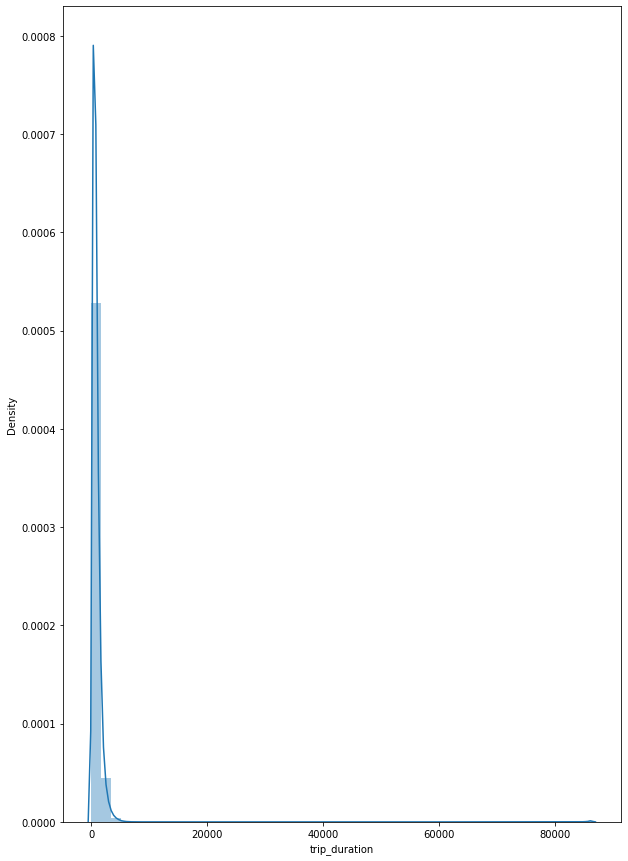

In [172]:
# Step1- Check the distribution and handle the skewnwss if present
# Trip_Duration (Target Variable)
plt.figure(figsize=(10,15))
sns.distplot(df['trip_duration'])
plt.xlabel('trip_duration')

Text(0.5, 0, 'trip_duration')

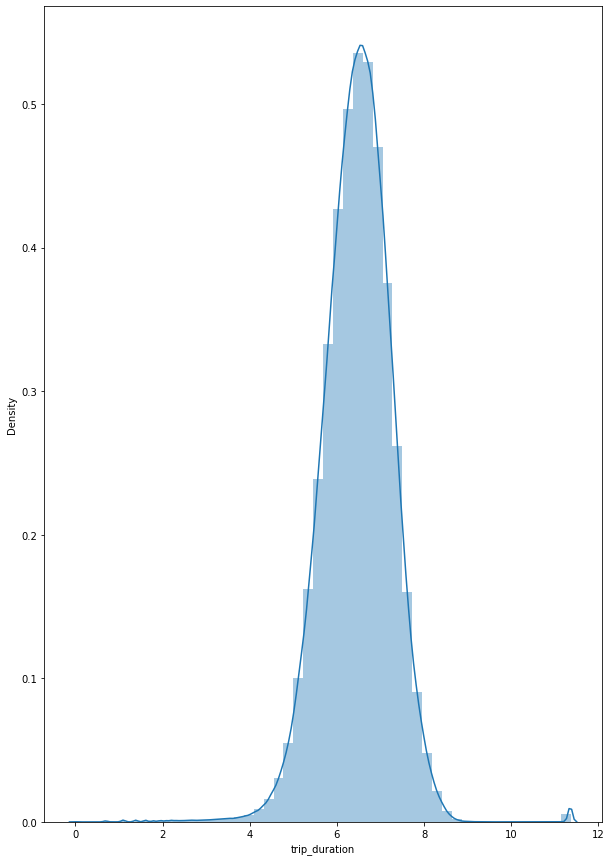

In [173]:
#Using log transform to bring it to normal distribution
plt.figure(figsize=(10,15))
sns.distplot(np.log(df['trip_duration']))
plt.xlabel('trip_duration')

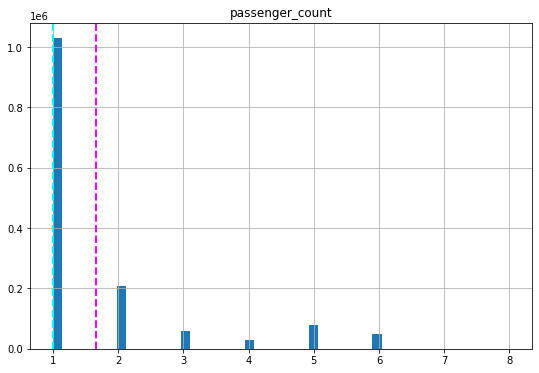

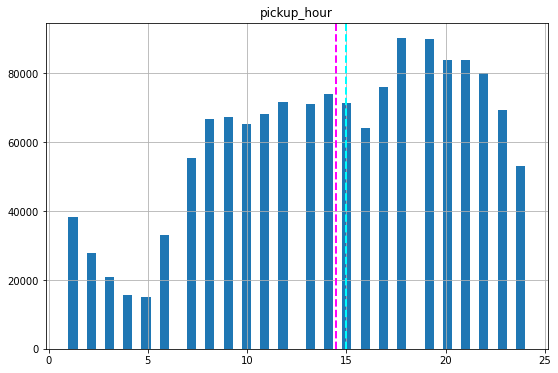

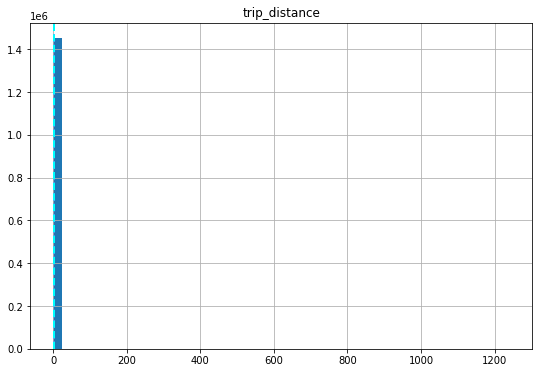

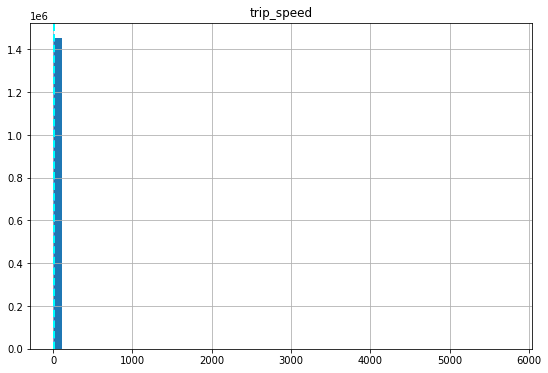

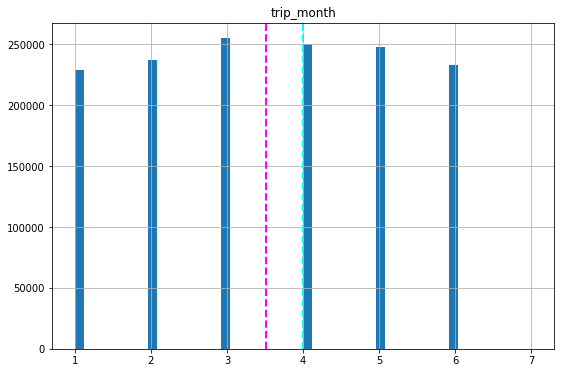

In [174]:
# plot a bar plot for each numerical features

for col in numeric_features:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  feature = df[col]
  feature.hist(bins=50, ax = ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(col)
plt.show()

Treating the skewness in the feature using log transform

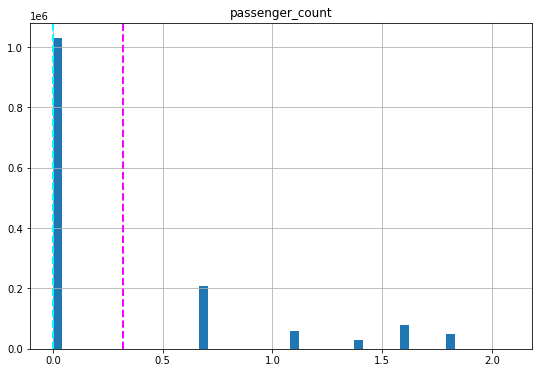

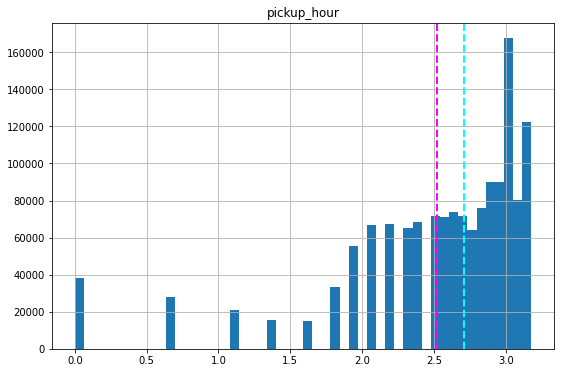

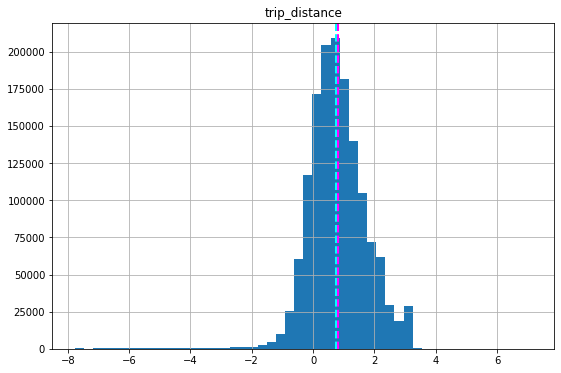

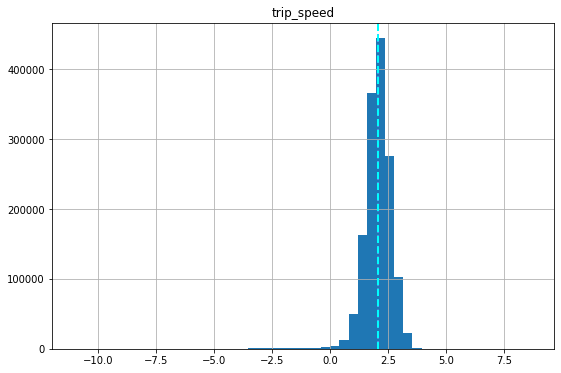

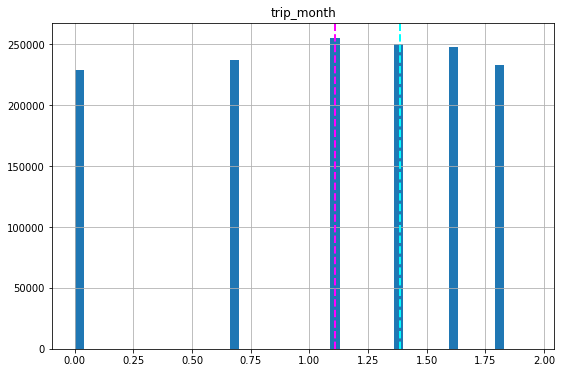

In [175]:
for col in numeric_features:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  feature = np.log(df[col])
  feature.hist(bins=50, ax= ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(col)
  plt.show()

#Step-3 Check for Linearity

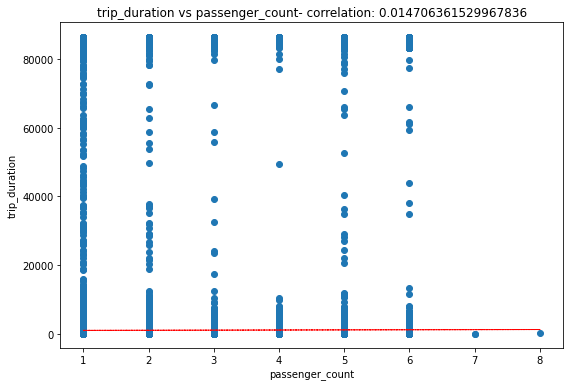

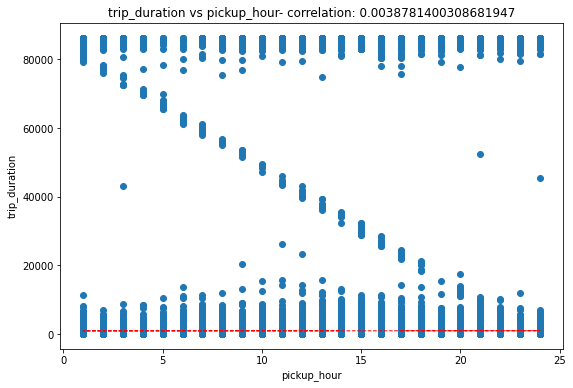

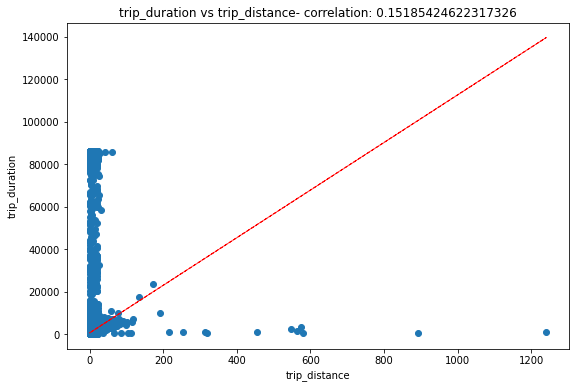

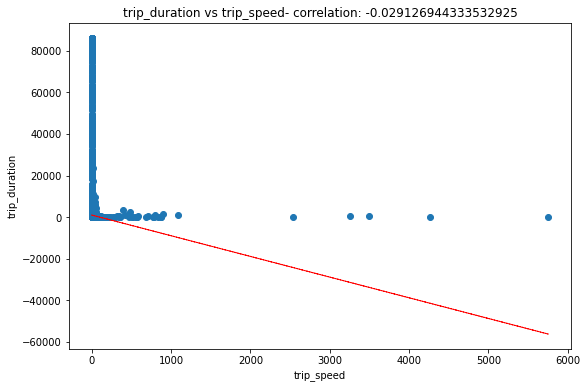

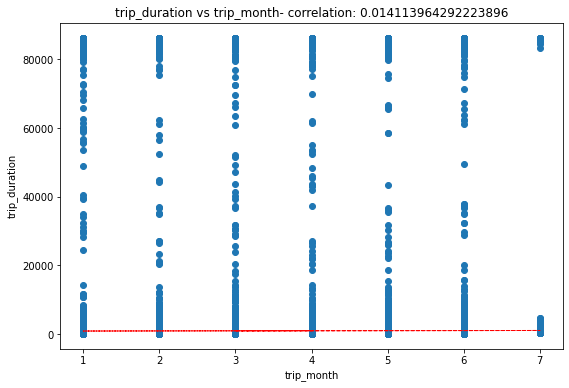

In [176]:
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['trip_duration']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('trip_duration')
    ax.set_title('trip_duration vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['trip_duration'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

From above plot we can conclude that only trip_distance and trip_speed were having a linear relationship with trip_duration

#Step-4 Encoding Categorical Features

In [177]:
df_copy = df.copy()

In [178]:
df_copy.shape

(1452691, 12)

In [179]:
df_copy.columns

Index(['vendor_id', 'passenger_count', 'store_and_fwd_flag', 'trip_duration',
       'pickup_datetime_day', 'dropoff_datetime_day', 'pickup_timezone',
       'dropoff_timezone', 'pickup_hour', 'trip_distance', 'trip_speed',
       'trip_month'],
      dtype='object')

In [180]:
df_copy.drop(labels=['dropoff_timezone','dropoff_datetime_day','store_and_fwd_flag',],axis=1,inplace=True)

In [181]:
numerical_features=['trip_distance','trip_speed']

In [182]:
categorical=df_copy.describe(include=['object','category']).columns

In [183]:
categorical

Index(['pickup_datetime_day', 'pickup_timezone'], dtype='object')

In [184]:
df['pickup_timezone'].value_counts()

evening       487988
midday        421630
late night    289749
morning       253324
Name: pickup_timezone, dtype: int64

In [185]:
# One hot encoding
df_copy = pd.get_dummies(df_copy,columns=["pickup_timezone"],prefix=["pickup_timezone"])


In [186]:
### Data encoding
#label encoding
encoders_nums = {
                 "pickup_datetime_day":{"Monday":1,"Tuesday":2,"Wednesday":3,"Thursday":4,"Friday":5,"Saturday":6,"Sunday":7},
                 }

df_copy = df_copy.replace(encoders_nums)

In [187]:
df_copy.head()

,vendor_id,passenger_count,trip_duration,pickup_datetime_day,pickup_hour,trip_distance,trip_speed,trip_month,pickup_timezone_evening,pickup_timezone_late night,pickup_timezone_midday,pickup_timezone_morning
0,2,1,455,1,17,1.498521,7.356956,3,1,0,0,0
1,1,1,663,7,24,1.805507,6.083206,6,0,1,0,0
2,2,1,2124,2,11,6.385098,6.715215,1,0,0,1,0
3,2,1,429,3,19,1.485498,7.735025,4,1,0,0,0
4,2,1,435,6,13,1.188588,6.103642,3,0,0,1,0


In [188]:
df_copy.shape

(1452691, 12)

In [189]:
df_copy.columns

Index(['vendor_id', 'passenger_count', 'trip_duration', 'pickup_datetime_day',
       'pickup_hour', 'trip_distance', 'trip_speed', 'trip_month',
       'pickup_timezone_evening', 'pickup_timezone_late night',
       'pickup_timezone_midday', 'pickup_timezone_morning'],
      dtype='object')

Handling Skewness using log Transform

In [190]:
df_copy['trip_distance'] = df_copy['trip_distance'].map(lambda x : np.log(x) if x != 0 else 0)
df_copy['trip_speed'] = df_copy['trip_speed'].map(lambda x : np.log(x) if x != 0 else 0)
df_copy['trip_month'] = df_copy['trip_month'].map(lambda x : np.log(x) if x != 0 else 0)
df_copy['pickup_hour'] = df_copy['pickup_hour'].map(lambda x : np.log(x) if x != 0 else 0)
df_copy['passenger_count'] = df_copy['passenger_count'].map(lambda x : np.sqrt(x) if x != 0 else 0)

Feature Selection

In [191]:
features = numerical_features

In [192]:
features.extend(['pickup_datetime_day','pickup_hour','trip_month',
       'pickup_timezone_evening', 'pickup_timezone_late night',
       'pickup_timezone_midday', 'pickup_timezone_morning'])

In [193]:
features

['trip_distance',
 'trip_speed',
 'pickup_datetime_day',
 'pickup_hour',
 'trip_month',
 'pickup_timezone_evening',
 'pickup_timezone_late night',
 'pickup_timezone_midday',
 'pickup_timezone_morning']

In [194]:
X = df_copy[features]
y = np.log(df_copy['trip_duration'])

**Lets split the data into train and test data**

In [195]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(1162152, 9)
(290539, 9)


In [196]:
# Scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Model Buliding

In [197]:
reg = LinearRegression().fit(X_train, y_train)

In [198]:
reg.score(X_train, y_train)

1.0

In [199]:
reg.coef_


array([ 1.48889637e+01, -1.96622983e+01,  4.88498131e-15,  2.22044605e-16,
        4.44089210e-16, -3.57134117e-01, -3.57134117e-01, -3.57134117e-01,
       -3.57134117e-01])

In [200]:
reg.intercept_

11.307696797128006

In [201]:
# Predicting the Test set results using training data
y_pred_train = reg.predict(X_train)

In [202]:
y_pred_train

array([6.70318811, 6.78445706, 7.38336815, ..., 6.03308622, 5.92692603,
       6.73340189])

## **Regression Evaluation Metrics**

---



Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
<br>MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
<br>RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
<br>All of these are loss functions, because we want to minimize them.

In [203]:
# Predicting the Test set results using test data
y_pred_test = reg.predict(X_test)

In [204]:
y_pred_test

array([7.06475903, 6.24804287, 6.95654544, ..., 7.04053639, 7.47929964,
       7.33236921])

In [205]:
# Test performance using Evaluation metrics
MSE  = mean_squared_error((y_test), (y_pred_test))
print("MSE :" , MSE)

MAE=mean_absolute_error((y_test), (y_pred_test))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_test))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 3.5812402920200293e-29
MAE : 4.7740476589577136e-15
RMSE : 5.984346490653787e-15
R2 : 1.0
Adjusted R2 :  1.0


#Plotting a Scatter plot on Actual vs Predicted trip duration Values

Text(0, 0.5, 'Predicted trip duration')

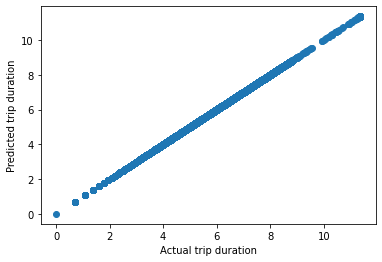

In [206]:
plt.scatter((y_test), (y_pred_test))
plt.xlabel('Actual trip duration')
plt.ylabel('Predicted trip duration')

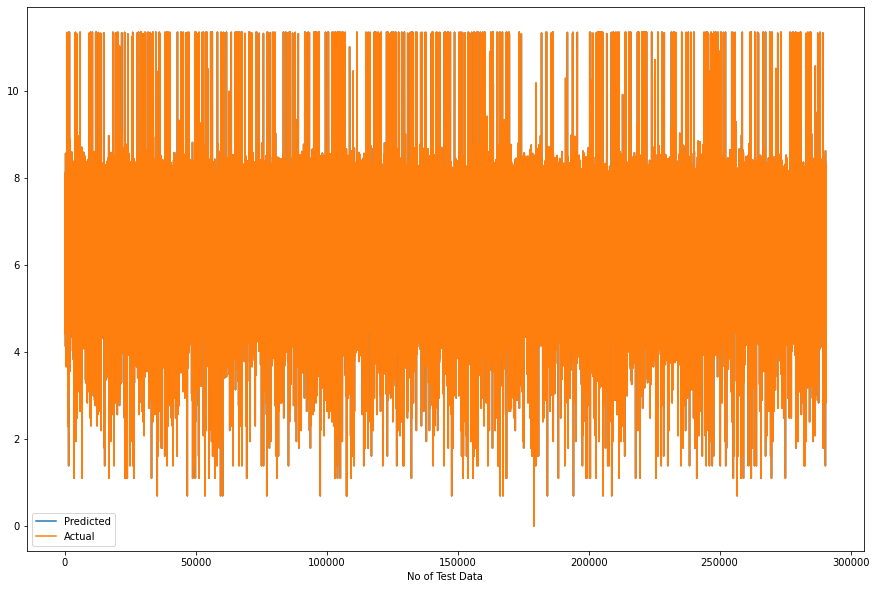

In [207]:
plt.figure(figsize=(15,10))
plt.plot((y_pred_test))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

If we see above graph our prediction is quiet good.

# **Residuals:**

---
A residual is the vertical distance between a data point and the regression line. Each data point has one residual. They are positive if they are above the regression line and negative if they are below the regression line

Text(0.5, 0.98, 'Residual Analysis')

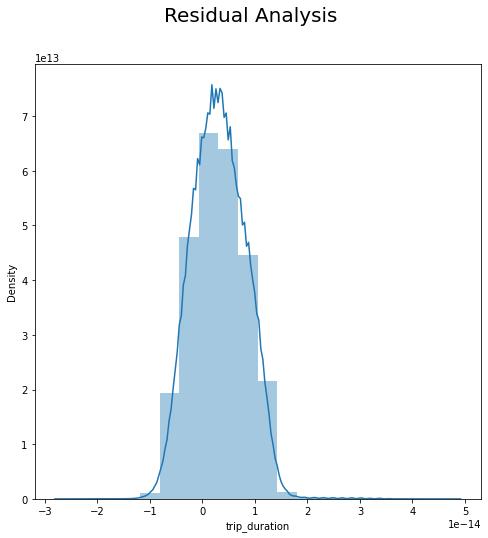

In [208]:
fig=plt.figure(figsize=(8,8))
  
sns.distplot(((y_test)- (y_pred_test)),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   

Text(0, 0.5, 'residuals')

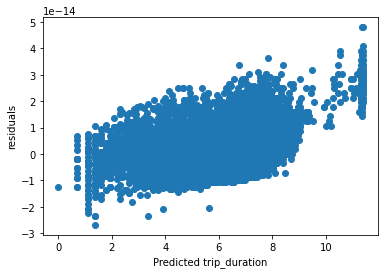

In [209]:
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))
plt.xlabel('Predicted trip_duration')
plt.ylabel('residuals')

# **Linear regression model from statsmodels.api.**

In [210]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [211]:
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

In [212]:
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.565e+33
Date:                Fri, 14 Oct 2022   Prob (F-statistic):               0.00
Time:                        02:15:46   Log-Likelihood:             4.6322e+07
No. Observations:             1452691   AIC:                        -9.264e+07
Df Residuals:                 1452682   BIC:                        -9.264e+07
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          6.1692   1.53e-17   4.02e+17      0.000       6.169       6.169
trip_distance                  1.0000   3.64e-18   2.75e+17      0.000       1.000       1.000
trip_speed                    -1.0000   5.84e-18  -1.71e+17      0.000      -1.000      -1.000
pickup_datetime_day        -8.243e-16   1.48e-18   -556.310      0.000   -8.27e-16   -8.21e-16
pickup_hour                -4.139e-16   5.05e-18    -82.026      0.000   -4.24e-16   -4.04e-16
trip_month                  1.177e-15    4.8e-18    245.216      0.000    1.17e-15    1.19e-15
pickup_timezone_evening        1.5423   7.19e-18   2.14e+17      0.000       1.542       1.542
pickup_timezone_late night     1.5423   6.97e-18   2.21e+17      0.000       1.542       1.542
pickup_timezone_midday         1.5423   5.99e-18   2.58e+17      0.000       1.542       1.542
pickup_timezone_morning        1.5423   6.42e-18    2.4e+17      0.000       1.542       1.542
==============================================================================
Omnibus:                     7883.016   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8012.008
Skew:                           0.182   Prob(JB):                         0.00
Kurtosis:                       3.007   Cond. No.                     6.63e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.07e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## **Implementing Lasso regression**

---
Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).

In [213]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.005 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.005, max_iter=3000)

In [214]:
lasso.score(X_train, y_train)

0.8880604588280283

In [215]:
y_pred_l = lasso.predict(X_test)

In [216]:
MSE  = mean_squared_error((y_test), (y_pred_l))
print("MSE :" , MSE)

MAE=mean_absolute_error((y_test), (y_pred_l))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_l))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_l)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.0693305698260319
MAE : 0.19172737519564748
RMSE : 0.263306987803271
R2 : 0.8875891555624769
Adjusted R2 :  0.8875856733021863


Text(0, 0.5, 'Predicted trip duration')

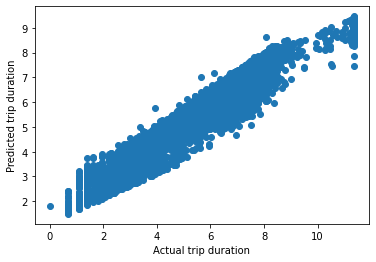

In [217]:
plt.scatter((y_test), (y_pred_l))
plt.xlabel('Actual trip duration')
plt.ylabel('Predicted trip duration')

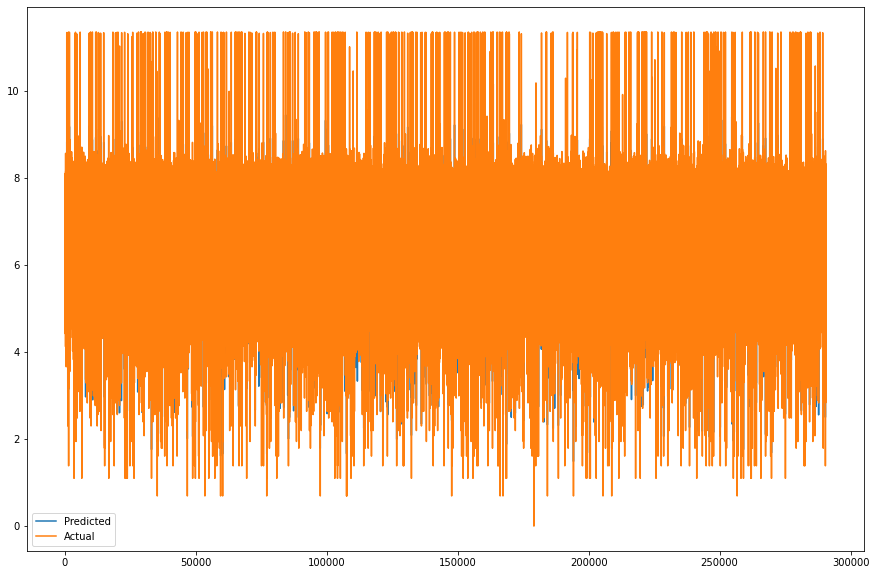

In [218]:
plt.figure(figsize=(15,10))
plt.plot((y_pred_l))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

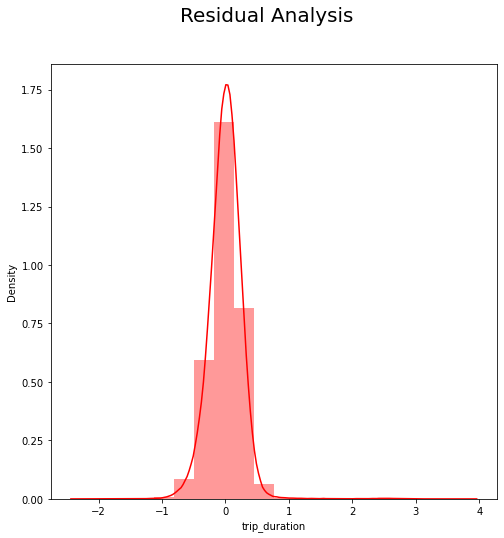

In [219]:
#Resuldual Analysis
fig=plt.figure(figsize=(8,8))
  
sns.distplot(((y_test)- (y_pred_l)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   

Text(0, 0.5, 'residuals')

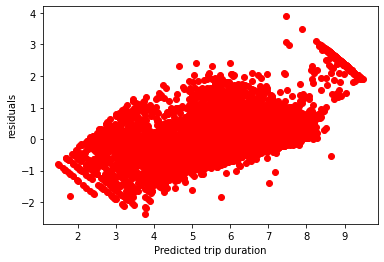

In [220]:
### Heteroscadacity
plt.scatter((y_pred_l),(y_test)-(y_pred_l),c='r')
plt.xlabel('Predicted trip duration')
plt.ylabel('residuals')

#Ridge

In [221]:
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)

In [222]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [223]:
ridge.score(X_train, y_train)

0.9999999885270318

In [224]:
y_pred_r = ridge.predict(X_test)

In [225]:
MSE  = mean_squared_error((y_test), (y_pred_l))
print("MSE :" , MSE)

MAE=mean_absolute_error((y_test), (y_pred_l))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_l))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_l)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.0693305698260319
MAE : 0.19172737519564748
RMSE : 0.263306987803271
R2 : 0.8875891555624769
Adjusted R2 :  0.8875856733021863


Text(0, 0.5, 'Predicted trip duration')

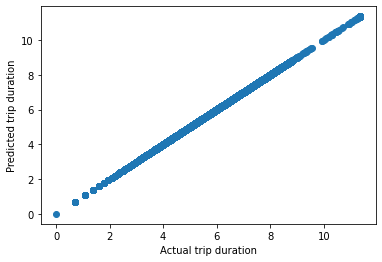

In [226]:
plt.scatter((y_test), (y_pred_r))
plt.xlabel('Actual trip duration')
plt.ylabel('Predicted trip duration')

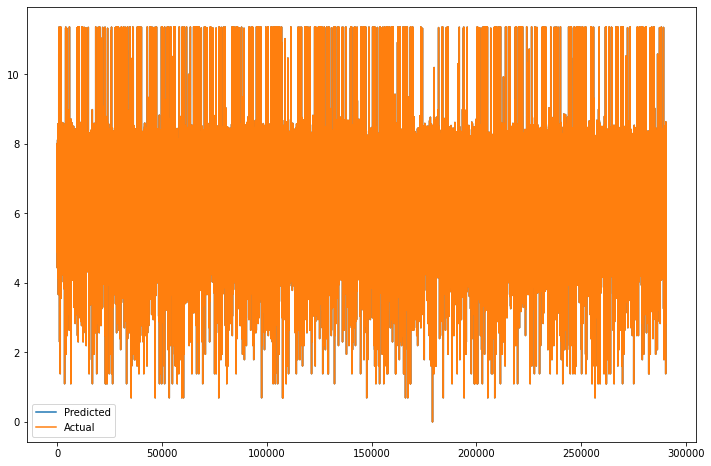

In [227]:
plt.figure(figsize=(12,8))
plt.plot((y_pred_r))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

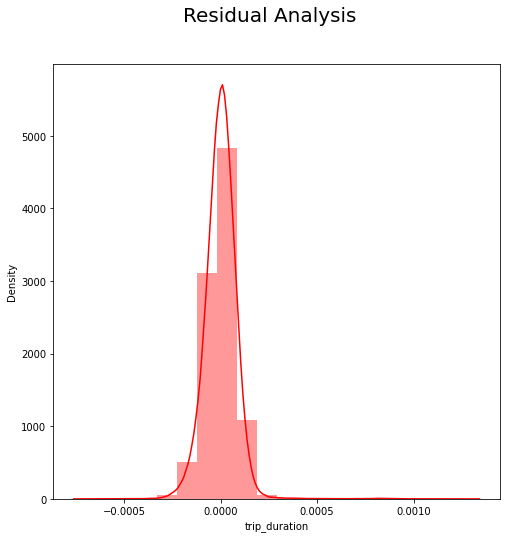

In [228]:
#Resuldual Analysis
fig=plt.figure(figsize=(8,8))
  
sns.distplot(((y_test)- (y_pred_r)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   

Text(0, 0.5, 'residuals')

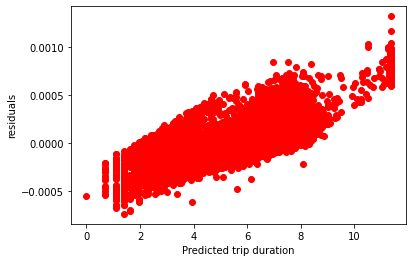

In [229]:
### Heteroscadacity
plt.scatter((y_pred_r),(y_test)-(y_pred_r),c='r')
plt.xlabel('Predicted trip duration')
plt.ylabel('residuals')

#Decision Tree

In [230]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [231]:
des_regressor = DecisionTreeRegressor(random_state=10)
cross_val_score(des_regressor, X_train, y_train, cv=10).mean()

0.9997045065275689

In [232]:
des_regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=10)

In [233]:
y_pred_des = des_regressor.predict(X_test)

In [234]:
#Evaluating the model using regression metrics
MSE  = mean_squared_error((y_test), (y_pred_des))
print("MSE :" , MSE)

MAE=mean_absolute_error((y_test), (y_pred_des))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_des))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_des)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.00013511972875092853
MAE : 0.0029625133126252243
RMSE : 0.011624101201853351
R2 : 0.9997809202658052
Adjusted R2 :  0.9997809134791588


Text(0, 0.5, 'Predicted trip duration')

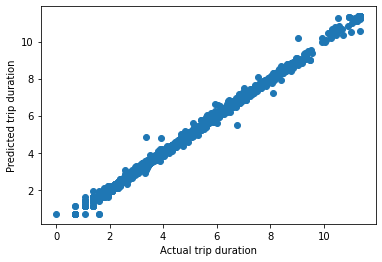

In [235]:
plt.scatter((y_test), (y_pred_des))
plt.xlabel('Actual trip duration')
plt.ylabel('Predicted trip duration')

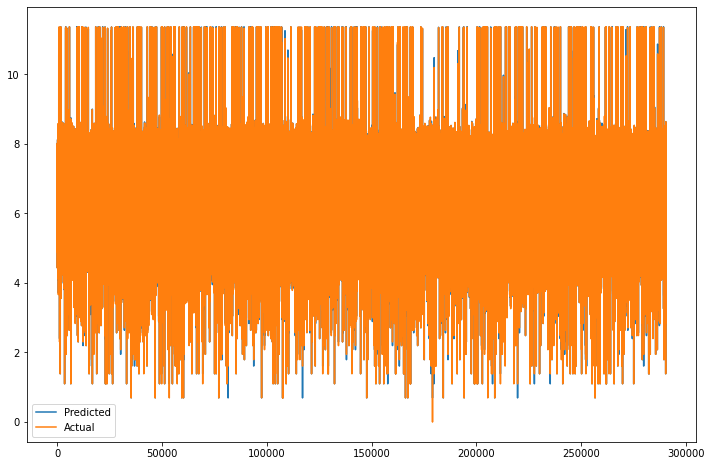

In [236]:
plt.figure(figsize=(12,8))
plt.plot((y_pred_des))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#Random Forest

In [237]:
from sklearn.ensemble import RandomForestRegressor 

In [238]:
rf= RandomForestRegressor()

In [239]:
param_dict_rf = {
    'max_depth': [4, 6, 8],
 'n_estimators': [80, 100]
  }

In [240]:
rf_random = RandomizedSearchCV(estimator=rf,
                       param_distributions = param_dict_rf,
                       cv = 3, verbose=2)

In [241]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END .......................max_depth=4, n_estimators=80; total time= 2.1min
[CV] END .......................max_depth=4, n_estimators=80; total time= 2.1min
[CV] END .......................max_depth=4, n_estimators=80; total time= 2.1min
[CV] END ......................max_depth=4, n_estimators=100; total time= 2.6min
[CV] END ......................max_depth=4, n_estimators=100; total time= 2.6min
[CV] END ......................max_depth=4, n_estimators=100; total time= 2.6min
[CV] END .......................max_depth=6, n_estimators=80; total time= 2.9min
[CV] END .......................max_depth=6, n_estimators=80; total time= 2.9min
[CV] END .......................max_depth=6, n_estimators=80; total time= 2.9min
[CV] END ......................max_depth=6, n_estimators=100; total time= 3.6min
[CV] END ......................max_depth=6, n_estimators=100; total time= 3.5min
[CV] END ......................max_depth=6, n_est

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [4, 6, 8],
                                        'n_estimators': [80, 100]},
                   verbose=2)

In [242]:
print(rf_random.best_params_)

{'n_estimators': 100, 'max_depth': 8}


In [243]:
print('Train  neg_mean_squared_error score : ', rf_random.best_estimator_.score(X_train,y_train))
print('Test neg_mean_squared_error score: ', rf_random.best_estimator_.score(X_test,y_test))

Train  neg_mean_squared_error score :  0.9817478525472774
Test neg_mean_squared_error score:  0.9816460478842974


In [244]:
rf_model = rf_random.best_estimator_

#XGBOOST

In [245]:
import xgboost as xg

In [247]:
xgb = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

In [248]:
param_dict_xgb = {
    'max_depth': [4, 6, 8],
 'n_estimators': [60, 100]
  }

In [249]:
xgb_random = RandomizedSearchCV(estimator=xgb,
                       param_distributions = param_dict_xgb,
                       cv = 5, verbose=2)

xgb_random.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[03:31:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END .......................max_depth=4, n_estimators=60; total time=  53.0s
[03:32:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END .......................max_depth=4, n_estimators=60; total time=  57.1s
[03:33:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END .......................max_depth=4, n_estimators=60; total time=  56.2s
[03:34:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END .......................max_depth=4, n_estimators=60; total time=  53.1s
[03:35:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of

RandomizedSearchCV(cv=5, estimator=XGBRegressor(n_estimators=10, seed=123),
                   param_distributions={'max_depth': [4, 6, 8],
                                        'n_estimators': [60, 100]},
                   verbose=2)

In [250]:
xgb_random.best_params_

{'n_estimators': 100, 'max_depth': 8}

In [251]:
print('Train neg_mean_squared_error score score : ', xgb_random.best_estimator_.score(X_train,y_train))
print('Test neg_mean_squared_error score score : ', xgb_random.best_estimator_.score(X_test,y_test))

Train neg_mean_squared_error score score :  0.9998580409752776
Test neg_mean_squared_error score score :  0.9997983261250135


In [252]:
xgb_model = xgb_random.best_estimator_